In [1]:
#@title Import libraries and Google Drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import time

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Tennessee Eastman Process TEP

In [2]:
#@title instalar **pyreadr**
# pip install pyreadr
!pip install pyreadr

     |████████████████████████████████| 419kB 7.7MB/s 


In [3]:
#@title Importamos dataset

import pyreadr
'''
Dataset de training
'''
t = time.time()

TEP_FaultFree_Training_R = pyreadr.read_r("/content/drive/MyDrive/TEP/TEP_FaultFree_Training.RData")
TEP_Faulty_Training_R = pyreadr.read_r("/content/drive/MyDrive/TEP/TEP_Faulty_Training.RData")

'''
Dataset de testing
'''
elapsed = time.time() - t
print("time: ", elapsed)

FF_tr = TEP_FaultFree_Training_R['fault_free_training']
F_tr = TEP_Faulty_Training_R['faulty_training']

time:  20.41486167907715


In [4]:
#@title Extraemos una muestra del dataset original

# reducimos el dataset
red_frac = 64
rows_ext = int(250000/red_frac)
df_exp = pd.DataFrame()

print('Original Datafram:',F_tr.shape)

# extraemos valores para los 2o diferentes tipos de faltas
for i in range(1,21):
  data_in = F_tr[F_tr.faultNumber ==i].iloc[:rows_ext,:]
  df_exp = pd.concat((df_exp,data_in))

print('Faults:',df_exp.shape)

''' Agregamos los valores con faltas = 0 '''
df_exp = pd.concat(( df_exp , FF_tr.iloc[:rows_ext,:]))
print('Faults & non-faults:',df_exp.shape)

"""Concatenamos el dataset"""
fault_detec = df_exp
fault_detec.shape

Original Datafram: (5000000, 55)
Faults: (78120, 55)
Faults & non-faults: (82026, 55)


(82026, 55)

In [ ]:
#@title Muestra del Dataset

print("Concatenated dataset dimension: ", fault_detec.shape)
fault_detec.head()
# fault_detec[fault_detec.faultNumber ==5].shape

Concatenated dataset dimension:  (82026, 55)


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,xmeas_17,xmeas_18,xmeas_19,xmeas_20,xmeas_21,xmeas_22,xmeas_23,xmeas_24,xmeas_25,xmeas_26,xmeas_27,xmeas_28,xmeas_29,xmeas_30,xmeas_31,xmeas_32,xmeas_33,xmeas_34,xmeas_35,xmeas_36,xmeas_37,xmeas_38,xmeas_39,xmeas_40,xmeas_41,xmv_1,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,80.044,51.435,2632.9,25.029,50.528,3101.1,22.819,65.732,229.61,341.22,94.640,77.047,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.8357,0.098577,53.724,43.828,62.881,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,80.078,50.154,2633.8,24.419,48.772,3102.0,23.333,65.716,230.54,341.30,94.595,77.434,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.8357,0.098577,53.724,43.828,63.132,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,80.220,50.302,2635.5,25.244,50.071,3103.5,21.924,65.732,230.08,341.38,94.605,77.466,31.767,8.7694,26.095,6.8259,18.961,1.6292,32.985,13.742,23.897,1.3001,18.765,2.2602,4.8543,2.3900,0.017866,0.8357,0.098577,53.724,43.828,63.117,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,80.305,49.990,2635.6,23.268,50.435,3102.8,22.948,65.781,227.91,341.71,94.473,77.443,31.767,8.7694,26.095,6.8259,18.961,1.6292,32.985,13.742,23.897,1.3001,18.765,2.2602,4.8543,2.3900,0.017866,0.8357,0.098577,53.724,43.828,63.100,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,80.064,51.310,2632.4,26.099,50.480,3103.5,22.808,65.788,231.37,341.11,94.678,76.947,32.322,8.5821,26.769,6.8688,18.782,1.6396,33.071,13.834,24.228,1.0938,18.666,2.2193,4.8304,2.2416,0.017866,0.8357,0.098577,53.724,43.828,63.313,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [ ]:
#@title Descripción del Dataset
fault_detec.describe()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,xmeas_17,xmeas_18,xmeas_19,xmeas_20,xmeas_21,xmeas_22,xmeas_23,xmeas_24,xmeas_25,xmeas_26,xmeas_27,xmeas_28,xmeas_29,xmeas_30,xmeas_31,xmeas_32,xmeas_33,xmeas_34,xmeas_35,xmeas_36,xmeas_37,xmeas_38,xmeas_39,xmeas_40,xmeas_41,xmv_1,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
count,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000,82026.000000
mean,10.000000,4.415771,245.614695,0.262323,3663.258246,4503.455708,9.361013,26.901079,42.358123,2719.648727,74.910297,120.400373,0.345571,79.818287,49.998106,2647.507154,25.114686,49.947997,3118.306535,22.947103,65.961036,243.531158,340.101338,94.462177,77.027710,31.944600,8.884870,26.745020,6.877333,18.749346,1.630281,32.588992,13.807302,24.535955,1.256432,18.520109,2.225322,4.792871,2.270449,0.018296,0.842562,0.097872,53.742863,43.766648,63.286256,54.026287,30.298518,62.959794,22.119022,40.125653,38.094417,46.413662,50.646972,42.565541,18.576343
std,6.055338,2.252667,142.483542,0.145107,40.463532,105.399354,0.328659,0.231104,0.301558,70.167513,1.263361,0.071271,0.084190,1.674085,1.012720,70.338948,1.064174,1.035791,74.494125,0.644904,1.840314,66.323431,10.389173,1.237489,1.435727,1.688407,0.206637,1.913522,0.128444,0.838240,0.124747,2.534008,0.271348,2.949152,0.135637,1.168387,0.170545,0.327502,0.176964,0.010275,0.085102,0.013294,0.570275,0.603515,2.307793,3.684593,19.912191,6.765222,8.033203,12.236833,2.980290,2.397108,16.603546,9.604749,4.161831
min,0.000000,1.000000,1.000000,-0.003999,3383.500000,3738.200000,7.442000,25.493000,40.444000,2449.300000,63.913000,119.650000,0.055312,68.297000,45.591000,2359.000000,19.844000,45.541000,2893.600000,19.725000,55.305000,-2.368600,255.130000,80.364000,63.959000,23.663000,7.443800,18.629000,6.101100,12.637000,0.939820,20.229000,12.262000,12.324000,0.415950,10.478000,1.297500,3.224700,1.425600,-0.019730,0.398470,0.027588,51.209000,41.022000,58.770000,35.891000,-0.056625,47.226000,-0.040454,0.000000,25.125000,36.215000,-0.268380,-0.210000,-0.002106
25%,5.000000,2.000000,123.000000,0.219642,3637.100000,4469.000000,9.264500,26.761000,42.180000,2697.700000,74.446000,120.390000,0.323180,79.804000,49.307000,2625.300000,24.389000,49.263000,3096.400000,22.526000,65.395000,223.150000,339.160000,94.439000,76.981000,31.893000,8.797000,26.129000,6.801400,18.513000,1.629500,32.588000,13.709000,23.669000,1.182300,18.251000,2.233000,4.772600,2.245700,0.010866,0.817980,0.090246,53.371000,43.401000,62.619000,53.494000,22.389000,60.296000,21.414000,38.347000,36.061250,44.829000,45.574000,40.618000,17.112000
50%,10.000000,4.000000,245.000000,0.251360,3662.100000,4507.800000,9.354200,26.899000,42.346000,2705.800000,74.961000,120.400000,0.336370,80.084000,50.025000,2634.200000,25.128000,49.906000,3102.900000,22.954000,65.821000,233.080000,341.270000,94.597000,77.266000,32.181000,8.887100,26.422000,6.882000,18.780000,1.654500,32.934000,13.816000,24.026000,1.258900,18.568000,2.261800,4.843100,2.297500,0.018463,0.836480,0.098577,53.734000,43.785000,63.069000,53.970000,25.186000,61.447000,22.143000,39.995000,38.173000,46.317000,48.126000,41.217000,18.250000
75%,15.000000,6.000000,367.000000,0.282260,3689.300000,4545.800000,9.451300,27.043000,42.521

# Classification models testing:


## Data split

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# definimos nuestra X,y
X = fault_detec.values[:,3:]
y = fault_detec.values[:,np.r_[0]]
print('X shape:',X.shape)
print('y shape:',y.shape)

X shape: (82026, 52)
y shape: (82026, 1)


# DATA TOTALLY RAW

In [ ]:
#@title tpr and tnr definitions
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [ ]:
#@title **code: learning curve**
def show_curve(est,X,y):
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()
    return means, stds

In [9]:
#@title Split dataset (30/70)

# t = time.time()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
# elapsed = time.time() - t

print('After splitting the data dataset')
print('X shape:',X_train.shape, X_test.shape)
print('y shape:',y_train.shape, y_test.shape)

After splitting the data dataset
X shape: (57418, 52) (24608, 52)
y shape: (57418, 1) (24608, 1)


## Naives bayes

Accuracy: 0.5411248374512354
Time: 0.34697866439819336
              precision    recall  f1-score   support

         0.0       0.12      0.23      0.16      1182
         1.0       0.92      0.87      0.89      1211
         2.0       1.00      0.90      0.95      1183
         3.0       0.14      0.24      0.18      1223
         4.0       0.88      0.94      0.91      1137
         5.0       0.31      0.26      0.29      1155
         6.0       1.00      0.87      0.93      1181
         7.0       0.92      0.83      0.87      1172
         8.0       0.74      0.57      0.65      1141
         9.0       0.11      0.04      0.06      1197
        10.0       0.34      0.32      0.33      1118
        11.0       0.72      0.64      0.68      1204
        12.0       0.55      0.62      0.58      1126
        13.0       0.71      0.66      0.69      1173
        14.0       0.78      0.81      0.80      1156
        15.0       0.13      0.16      0.14      1129
        16.0       0.21   

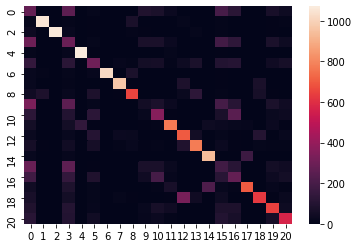

In [ ]:
#@title Single model
#@markdown Planteamos un solo modelo
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
t = time.time()

GNB = GaussianNB()
GNB.fit(X_train, y_train.ravel())
y_pred_GNB = GNB.predict(X_test)

cm = confusion_matrix(y_test, y_pred_GNB)
# print(cm)
sn.heatmap(cm)
print('Accuracy:',accuracy_score(y_test, y_pred_GNB))

elapsed = time.time() - t
print('Time:',elapsed)

print(classification_report(y_test,y_pred_GNB))

Time: 6.3334105014801025
media mean: 38.17778033193682
std mean: 1.438797831926884


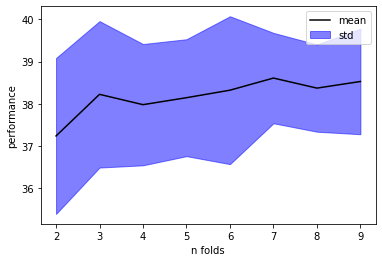

In [ ]:
#@title Cross Validation 1
#@markdown Variamos los valores para KFold de 2 a 10, obervamos la curva de aprendizaje

t = time.time()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import *

media, std = show_curve(GNB,X,y.ravel())

elapsed = time.time() - t
print('Time:',elapsed)
print('media mean:', np.mean(media))
print('std mean:',np.mean(std))

## Decision Tree

Accuracy 0.5213751625487646
Time:  6.394150257110596
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1167
         1.0       0.95      0.92      0.94      1182
         2.0       1.00      0.93      0.96      1202
         3.0       0.00      0.00      0.00      1203
         4.0       0.94      0.93      0.93      1188
         5.0       0.97      0.48      0.64      1160
         6.0       1.00      0.94      0.97      1133
         7.0       1.00      0.95      0.97      1203
         8.0       0.67      0.56      0.61      1191
         9.0       0.10      0.88      0.18      1109
        10.0       0.00      0.00      0.00      1225
        11.0       0.92      0.51      0.66      1112
        12.0       0.54      0.61      0.57      1187
        13.0       0.74      0.47      0.58      1212
        14.0       0.97      0.82      0.89      1172
        15.0       0.00      0.00      0.00      1160
        16.0       0.08     

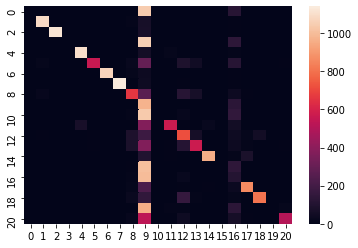

In [10]:
#@title Single model
#@markdown Planteamos un solo modelo como punto de partida

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

t = time.time()
# splitter='random'
# splitter='best'
# criterion='entropy'
# criterion='gini'
DT = DecisionTreeClassifier(criterion='entropy', max_depth=10, splitter='best')
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)
cm = confusion_matrix(y_test, y_pred_DT)
# print(cm)
sn.heatmap(cm)
print('Accuracy',accuracy_score(y_test, y_pred_DT))

elapsed = time.time() - t
print('Time: ',elapsed)

print(classification_report(y_test,y_pred_DT, zero_division=0))

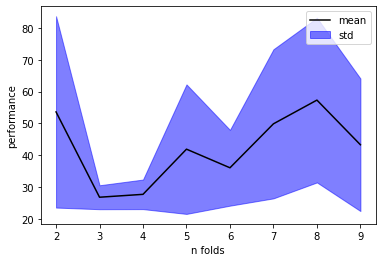

In [ ]:
#@title Cross Validation
#@markdown Variamos los valores para KFold de 2 a 10, obervamos la curva de aprendizaje
#@markdown (toma su tiempo es ejecutar)

media, std = show_curve(DT,X,y.ravel())

No handles with labels found to put in legend.


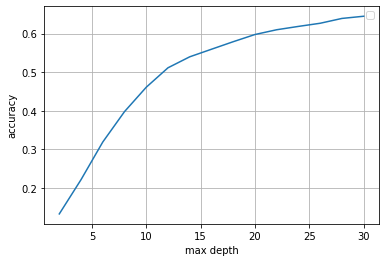

In [11]:
#@title Max depth variation
#@markdown Variamos los valores para Max depth de 2 a 10, obervamos la curva de aprendizaje
#@markdown (el resto de parametros se mantienen en Default)

from sklearn.metrics import accuracy_score

# accu, tprs, tnrs = [],[],[]
accu = []

fondo = 30

depth = range(2,fondo+1,2)

for i in depth:
  est = DecisionTreeClassifier(max_depth=i)
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  accu.append(accuracy_score(y_test,y_pred))

plt.plot(depth, accu)
plt.grid()
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()


Accuracy: 0.6427178153446034
              precision    recall  f1-score   support

         0.0       0.12      0.44      0.19      1137
         1.0       0.99      0.95      0.97      1184
         2.0       1.00      0.92      0.96      1184
         3.0       0.12      0.09      0.10      1165
         4.0       0.94      0.90      0.92      1166
         5.0       0.94      0.73      0.82      1217
         6.0       1.00      0.96      0.98      1201
         7.0       0.99      0.94      0.97      1180
         8.0       0.86      0.75      0.80      1163
         9.0       0.14      0.30      0.19      1118
        10.0       0.61      0.45      0.52      1157
        11.0       0.86      0.69      0.76      1160
        12.0       0.80      0.70      0.75      1156
        13.0       0.91      0.74      0.82      1197
        14.0       0.98      0.90      0.93      1189
        15.0       0.07      0.00      0.00      1161
        16.0       0.47      0.50      0.48      117

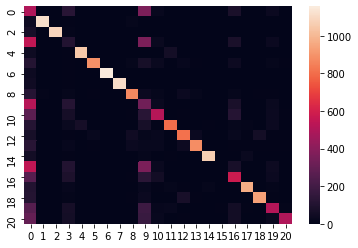

In [11]:
#@title Best Max depth testing
#@markdown Probamos con un valor de Max depth de 20, con base en la gráfica anterior
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

DT = DecisionTreeClassifier(criterion='entropy', max_depth=20, splitter='best')
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

cm = confusion_matrix(y_test, y_pred_DT)
# print(cm)
sn.heatmap(cm)

print('Accuracy:',accuracy_score(y_test, y_pred_DT))
print(classification_report(y_test,y_pred_DT))

## Feature importance

In [12]:
#@title Comparación aportes de las variables

print('Todas las características')
print(DT.feature_importances_)
print('Características totales:',DT.feature_importances_.shape)
print('Características con aporte > 0.002:',DT.feature_importances_[DT.feature_importances_ > 0.002].shape)

# n = 6
# mejores = DT.feature_importances_
# indices_mejores = np.argsort(mejores)[-n:]
# indices_mejores

Todas las características
[0.0362411  0.00107607 0.00139855 0.02126868 0.01850894 0.00035665
 0.00297991 0.00143657 0.04546577 0.07471415 0.01715229 0.00037136
 0.00442768 0.00058524 0.00031643 0.01862232 0.01719478 0.03479326
 0.01560283 0.02434398 0.08745664 0.04749344 0.00245421 0.00149858
 0.00265066 0.00065127 0.00159244 0.00322556 0.01648834 0.0036531
 0.00465584 0.00103264 0.01354505 0.00577212 0.00292616 0.0051632
 0.00053632 0.00766586 0.00082564 0.00175143 0.00133073 0.00118448
 0.00413947 0.13018491 0.0783237  0.02906191 0.01752233 0.0004778
 0.00069744 0.02024088 0.14325392 0.02568735]
Características totales: (52,)
Características con aporte > 0.002: (34,)


In [ ]:
#@title **CODE:** Seleccionamos indices de N mejores Features
def mejores_indices(est, n):
  mejores = est.feature_importances_
  indices_mejores = np.argsort(mejores)[-n:]
  return indices_mejores

# a = mejores_indices(DT,8)
# a

# DATA PROCESADA

In [13]:
#@title Split data

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# definimos nuestra X,y
X = fault_detec.values[:,3:]
y = fault_detec.values[:,np.r_[0]]
print('X shape:',X.shape)
print('y shape:',y.shape)

# t = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
# elapsed = time.time() - t

print('After splitting the data dataset')
print('X shape:',X_train.shape, X_test.shape)
print('y shape:',y_train.shape, y_test.shape)


X shape: (82026, 52)
y shape: (82026, 1)
After splitting the data dataset
X shape: (57418, 52) (24608, 52)
y shape: (57418, 1) (24608, 1)


In [ ]:
#@title Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# print(X_train[:2,:])

In [14]:
#@title Decision Tree and feature importance

DT = DecisionTreeClassifier(max_depth=20)
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)
mejores = DT.feature_importances_
# indices_mejores = np.argsort(mejores)[-n:]
print(mejores)

[0.15119575 0.00097553 0.00072734 0.03416487 0.02238874 0.00158584
 0.00120863 0.00410763 0.09351354 0.08054818 0.01311115 0.00046626
 0.00204498 0.00039066 0.00061107 0.04182339 0.01429797 0.01892821
 0.01695367 0.0184447  0.09741516 0.04864111 0.00165269 0.00306317
 0.0046204  0.00043262 0.00791158 0.0066821  0.02268941 0.00338226
 0.00831949 0.00084211 0.00441474 0.00409075 0.00244288 0.00702509
 0.00097768 0.01046034 0.00185136 0.00218814 0.0013927  0.00084989
 0.00582462 0.0095538  0.06878616 0.0248323  0.00468678 0.00027117
 0.00064759 0.01814394 0.08541304 0.02300681]


In [ ]:
#@title NGB  y Decision Tree variando cantidad de features
# mejores.shape
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

t = time.time()

# feat_nun = 52
feat_nun = np.size(mejores)
cant_feat = range(1,feat_nun+1)

mejores = DT.feature_importances_
# indices_mejores = np.argsort(mejores)[-n:]

accu = []
accu_DTC = []

GNB = GaussianNB()
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter='best')
for i in cant_feat:
  # print(i)
  # creamos sub dataset
  indices_mejores = np.argsort(mejores)[-i:]

  X_train_best = X_train[:,indices_mejores]
  X_test_best = X_test[:,indices_mejores]
  # entrenamos modelo
  GNB.fit(X_train_best, y_train.ravel())
  DTC.fit(X_train_best, y_train.ravel())
  # predicciones
  y_pred_GNB = GNB.predict(X_test_best)
  accu.append(accuracy_score(y_test, y_pred_GNB))
  y_pred_DTC = DTC.predict(X_test_best)
  accu_DTC.append(accuracy_score(y_test, y_pred_DTC))

elapsed = time.time() - t
print('Time: ',elapsed)

Time:  105.99532532691956


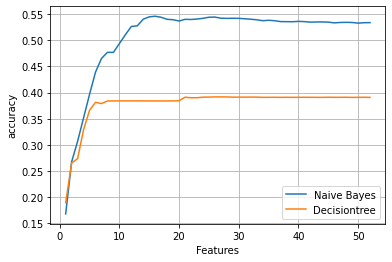

In [ ]:
#@title ploteamos resultados anteriores

# plt.subplot(1,2,1)
plt.plot(cant_feat, accu)
plt.plot(cant_feat, accu_DTC)
plt.grid()
plt.xlabel("Features")
plt.ylabel("accuracy")
plt.legend(['Naive Bayes','Decisiontree'])

In [ ]:
#@title NGB  y Decision Tree variando valores de PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import *

t = time.time()

# cant_feat = [1,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52]
cant_feat = [1,5,10,15,20,25,30,35,40,45,50,51]
# cant_feat = [1,10,20,30,40,50]
# cant_feat = [1,20]

# mejores = DT.feature_importances_
# indices_mejores = np.argsort(mejores)[-n:]

accu = []
accu_DTC = []

GNB = GaussianNB()
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter='best')
for i in cant_feat:
  # creamos y entreamos el objeto PCA
  pca = PCA(n_components=i)
  pca.fit(X_train)
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)
  
  # entrenamos modelo
  GNB.fit(X_train_pca, y_train.ravel())
  DTC.fit(X_train_pca, y_train.ravel())
  # predicciones
  y_pred_GNB = GNB.predict(X_test_pca)
  accu.append(accuracy_score(y_test, y_pred_GNB))
  y_pred_DTC = DTC.predict(X_test_pca)
  accu_DTC.append(accuracy_score(y_test, y_pred_DTC))

elapsed = time.time() - t
print('Time: ',elapsed)

Time:  111.57876253128052


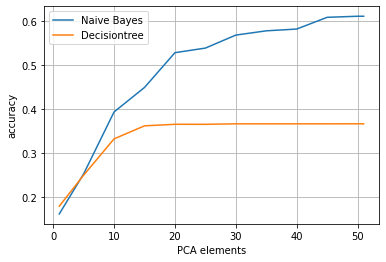

In [ ]:
#@title ploteamos resultados anteriores

# plt.subplot(1,2,1)
plt.plot(cant_feat, accu)
plt.plot(cant_feat, accu_DTC)
plt.grid()
plt.xlabel("PCA elements")
plt.ylabel("accuracy")
plt.legend(['Naive Bayes','Decisiontree'])

In [15]:
#@title Ejecutamos con la mejores características
#@markdown **NOTA:** antes de ejecutar, ejecutar celda "Decision Tree and feature importance"
# hacemos red neuronal 
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# definimos nuestra X,y
X = fault_detec.values[:,3:]
y = fault_detec.values[:,np.r_[0]]
print('X shape:',X.shape)
print('y shape:',y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
print('After splitting the data dataset')
print('X shape:',X_train.shape, X_test.shape)
print('y shape:',y_train.shape, y_test.shape)

# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# selection mejores features
n = 20
mejores = DT.feature_importances_
indices_mejores = np.argsort(mejores)[-n:]
indices_mejores

X_train_best = X_train[:,indices_mejores]
X_test_best = X_test[:,indices_mejores]


# one-hot-encoding
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=21)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=21)
print(y_train_ohe.shape, y_test_ohe.shape)

X shape: (82026, 52)
y shape: (82026, 1)
After splitting the data dataset
X shape: (57418, 52) (24608, 52)
y shape: (57418, 1) (24608, 1)
(57418, 21) (24608, 21)


In [16]:
#@title Definimos arquitectura de la red neuronal

model = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=X_train_best[0].shape),
          tf.keras.layers.Dense(256, activation=tf.nn.relu),
          tf.keras.layers.Dense(128, activation=tf.nn.relu),
          tf.keras.layers.Dense(64, activation=tf.nn.relu),
          tf.keras.layers.Dense(32, activation=tf.nn.relu),
          tf.keras.layers.Dense(16, activation=tf.nn.relu),
          tf.keras.layers.Dense(21, activation=tf.nn.softmax)
])

model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_best, y_train_ohe, epochs=75,
          batch_size=250,
          validation_data=(X_test_best, y_test_ohe))


Epoch 1/75
230/230 [==============================] - 4s 5ms/step - loss: 3.0422 - accuracy: 0.0624 - val_loss: 2.9541 - val_accuracy: 0.1315
Epoch 2/75
230/230 [==============================] - 1s 3ms/step - loss: 2.9097 - accuracy: 0.1365 - val_loss: 2.7692 - val_accuracy: 0.1711
Epoch 3/75
230/230 [==============================] - 1s 4ms/step - loss: 2.7257 - accuracy: 0.1908 - val_loss: 2.6084 - val_accuracy: 0.2547
Epoch 4/75
230/230 [==============================] - 1s 4ms/step - loss: 2.5600 - accuracy: 0.2788 - val_loss: 2.4025 - val_accuracy: 0.3080
Epoch 5/75
230/230 [==============================] - 1s 4ms/step - loss: 2.3476 - accuracy: 0.3214 - val_loss: 2.2036 - val_accuracy: 0.3383
Epoch 6/75
230/230 [==============================] - 1s 4ms/step - loss: 2.1529 - accuracy: 0.3487 - val_loss: 2.0221 - val_accuracy: 0.3649
Epoch 7/75
230/230 [==============================] - 1s 4ms/step - loss: 1.9922 - accuracy: 0.3767 - val_loss: 1.8904 - val_accuracy: 0.4089
Epoch 

In [18]:
#@title Resumen métricas arquitectura

import tensorflow as tf
from tensorflow import keras

# realizamos predicciones
y_pred_dnn = model.predict(X_test_best)

TP = tf.keras.metrics.TruePositives()
TN = tf.keras.metrics.TrueNegatives()
FP = tf.keras.metrics.FalsePositives()
FN = tf.keras.metrics.FalseNegatives()
recall = tf.keras.metrics.Recall()

cat_acc = tf.keras.metrics.CategoricalAccuracy()

TP.update_state(y_test_ohe, y_pred_dnn)
TN.update_state(y_test_ohe, y_pred_dnn)
FP.update_state(y_test_ohe, y_pred_dnn)
FN.update_state(y_test_ohe, y_pred_dnn)
cat_acc.update_state(y_test_ohe, y_pred_dnn)
recall.update_state(y_test_ohe, y_pred_dnn)

Total_pred = TP.result().numpy() + TN.result().numpy() + FP.result().numpy() + FN.result().numpy()

print('Predicciones totales:',Total_pred)
print('TP:',TP.result().numpy())
print('TN:',TN.result().numpy())
print('FP:',FP.result().numpy())
print('FN:',FN.result().numpy())
print('TPR:',TP.result().numpy()/(TP.result().numpy() + FN.result().numpy()))
print('TNR:',TN.result().numpy()/(TN.result().numpy() + FP.result().numpy()))

print('Categorical accuracy:',cat_acc.result().numpy())
print('Recall:',recall.result().numpy())


Predicciones totales: 516768.0
TP: 15899.0
TN: 491379.0
FP: 781.0
FN: 8709.0
TPR: 0.6460907
TNR: 0.99841315
Categorical accuracy: 0.71289825
Recall: 0.6460907


In [ ]:
#@title Summary
model.summary()

test_loss, test_acc = model.evaluate(X_test_best, y_test_ohe)
print('Test accuracy:', test_acc)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               5376      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 21)                3

# Visualización con entrenamiento no supervisado

In [ ]:
#@title Datasets
from sklearn.decomposition import PCA
print('Antes de PCA',X.shape)
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print('Despues de PCA',X_pca.shape)

Antes de PCA (82026, 52)
Despues de PCA (82026, 2)


In [ ]:
#@title Definición de los modelos

from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
t = time.time()

kmeans = KMeans(n_clusters=21) 
kmeans.fit(X_pca)

epsilon = 0.2
min_points = 500
DBS = DBSCAN(eps=epsilon)
DBS.fit(X_pca)

elapsed = time.time() - t
print('Time: ',elapsed)


Time:  10.30099606513977


Text(0.5, 1.0, 'DBSCAN')

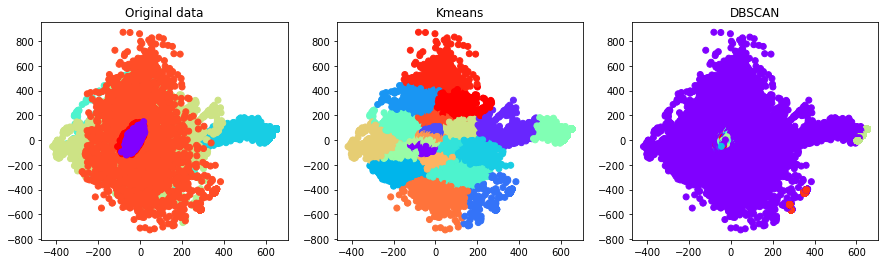

In [ ]:
#@title Graficamos resultados

kmeans_labels = kmeans.labels_
DBS_labels = DBS.labels_
plt.figure(figsize=(15,4))
plt.subplot(131);
plt.scatter(X_pca[:,0],X_pca[:,1], c=y, cmap='rainbow') 
plt.title('Original data')
plt.subplot(132);
plt.scatter(X_pca[:,0],X_pca[:,1], c=kmeans_labels, cmap='rainbow') 
plt.title('Kmeans')
plt.subplot(133);
plt.scatter(X_pca[:,0],X_pca[:,1], c=DBS_labels, cmap='rainbow') 
plt.title('DBSCAN')

# PRUEBAS/TESTEOS PRELIMINARES

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

t = time.time()

RF = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred_GNB)
# print(cm)
# sn.heatmap(cm)
print(accuracy_score(y_test, y_pred_RF))

elapsed = time.time() - t
print('Time: ',elapsed)

0.45630032365615647
Time:  20.293904066085815


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

t = time.time()

KNN = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto')
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred_KNN)
# print(cm)
# sn.heatmap(cm)
print(accuracy_score(y_test, y_pred_KNN))

elapsed = time.time() - t
print('Time: ',elapsed)

0.36456117467070576
Time:  74.10815215110779


## SVM

In [ ]:
from sklearn.svm import SVC

t = time.time()

# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
SVMC = SVC(C=1.0, kernel='linear', degree=3, gamma='scale')
SVMC.fit(X_train, y_train)
y_pred_SVMC = SVMC.predict(X_test)
cm = confusion_matrix(y_test, y_pred_GNB)
# print(cm)
# sn.heatmap(cm)
print(accuracy_score(y_test, y_pred_SVMC))

elapsed = time.time() - t
print('Time: ',elapsed)

## PCA DATA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold

print('Dimensiones originales de X:', X.shape)

X_pca = PCA(n_components=49).fit_transform(X)
print('Dimensiones de X despues de PCA:', X_pca.shape)

Dimensiones originales de X: (82026, 53)
Dimensiones de X despues de PCA: (82026, 49)


## Gaussian Naive

In [ ]:
from sklearn.naive_bayes import GaussianNB

# s = cross_val_score(GaussianNB(), X_pca, y, cv=KFold(3, shuffle=True), scoring=make_scorer(accuracy_score))
s = cross_val_score(GaussianNB(), X_pca, y, cv=KFold(10, shuffle=True), scoring="accuracy")
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.589 (+/- 0.00444)


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5)
s = cross_val_score(RF, X_pca, y, cv=KFold(5, shuffle=True), scoring="accuracy")
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.487 (+/- 0.01294)
